# <span style="font-family: 'Computer Modern'; font-size: 42pt; font-weight: bold;">Quantum Convolutional Neural Network (QCNN): *Laboratory of Particle Physics and Cosmology (LPPC)*</span>

In [1]:
#### ***** IMPORTS / DEPENDENCIES *****:

### *** PLOTTING ***:
import matplotlib; # (NOT ACCESSED)
import matplotlib.pyplot as plt

### *** PENNYLANE ***:
import pennylane as qml
from pennylane import numpy as np

### *** DATA ***:
import numpy as np
# import pandas as pd # (NOT ACCESSED)
import seaborn as sns
sns.set()

### *** JAX ***:
import jax;
## JAX CONFIGURATIONS:
jax.config.update('jax_platform_name', 'cpu')
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
# import jax.experimental.sparse as jsp # (NOT ACCESSED)
# import jax.scipy.linalg as jsl  # (NOT ACCESSED)

### *** RNG ***:
seed = 0
# Using NumPy (base):
# rng = np.random.default_rng(seed=seed) # ORIGINAL (NumPy)
# Using JAX (base):
rng_jax = jax.random.PRNGKey(seed=seed) # *1* (JAX)
rng_jax_arr = jnp.array(rng_jax) # *2* (JAX)

### *** OTHER ***:
# from glob import glob

In [2]:
#### ***** PACKAGE IMPORTS (IN PROGRESS) *****:
# ****************************************************************************************
## *1* MNIST DATA LOADING CLASS:
# from lppc_qcnn.load_qc_data import LoadDataQC # LoadDataQC() <--- STATIC METHOD

## *2* QUANTUM CIRCUIT AND LAYERS CLASS:
# from lppc_qcnn.circuit_layers import LayersQC # LayersQC() <--- INSTANCE METHOD (SELF)
# -> Define Instance of LayersQC:
# layers_obj = LayersQC()

## *3* TRAIN QCNN / RESULTS CLASS:
# from lppc_qcnn.circuit_layers import TrainQC # TrainQC() <--- INSTANCE METHOD (SELF)
# -> Define Instance of TrainQC:
# layers_obj = TrainQC()

## *$* QUANTUM AND MATH OPERATORS CLASS:
# from lppc_qcnn.qc_operators import QuantumMathOps # <--- STATIC METHOD
# -> Define Instance of QuantumMathOps:
# qmo_obj = QuantumMathOps()
# ****************************************************************************************

<span style="font-family: 'Computer Modern'; font-weight: bold; font-size: 24pt;">LOADING MNIST DATASET</span>

In [3]:
# ********************************************
#           INITIAL PARAMETER SETUP
# ********************************************

## MNIST DATA LOADING CLASS:
from lppc_qcnn.load_qc_data import LoadDataQC # <--- STATIC METHOD

## DEFINE VARIABLES:
n_qubits = 6 # Number of qubits
active_qubits = 6 # Active qubits
# active_qubits = list(range(active_qubits))
num_wires = 6 # Number of wires
num_wires_draw = 2 # Number of wires (DRAWINGS)
# num_wires_test = 4 # Number of wires (TEST)

## QUANTUM DEVICE:
device = qml.device('default.qubit.jax', wires=num_wires)
device = qml.device("default.mixed", wires=num_wires) # Six-qubit device
# device = qml.device("default.qubit", wires=num_wires) # Six-qubit device

<span style="font-family: 'Computer Modern'; font-weight: bold; font-size: 14pt;">Data Analysis / Testing (JAX):</span>

In [4]:
from lppc_qcnn.load_qc_data import DataQCNN # <--- STATIC METHOD
# -------------------------------------------------------------------------------------------------

# NumPy Attributes:
DataQCNN.dataset_structure(package='numpy')

# JAX Attributes:
DataQCNN.dataset_structure(package='jax')

------------NUMPY------------
___Shape+Type___:
• FEATURES type:  <class 'numpy.ndarray'>  | shape:  (1797, 64)
• LABELS type:  <class 'numpy.ndarray'>  | shape:  (1797,)
___DataType___:
• FEATURES dtype:  float64  | class type:  <class 'numpy.ndarray'>
• LABELS dtype:  int64  | class type:  <class 'numpy.int64'>
___SIZE___:
• FEATURES size:  115008
• LABELS size:  1797
------------JAX------------
___Shape+Type___:
• FEATURES type:  <class 'jaxlib.xla_extension.ArrayImpl'>  | shape:  (1797, 64)
• LABELS type:  <class 'jaxlib.xla_extension.ArrayImpl'>  | shape:  (1797,)
___DataType___:
• FEATURES dtype:  float64  | class type:  <class 'jaxlib.xla_extension.ArrayImpl'>
• LABELS dtype:  int64  | class type:  <class 'jaxlib.xla_extension.ArrayImpl'>
___SIZE___:
• FEATURES size:  115008
• LABELS size:  1797


In [5]:
# ********************************************
#          LOADING THE MNIST DATASET
# ********************************************

## DEFINE VARIABLES (DATA):
n_train = 2
n_test = 2
num_train = 2 # used in load_digits_data_jax
num_test = 2 # used in load_digits_data_jax

## DATA PARAMETERS:
rng_jax = jax.random.PRNGKey(seed=seed)  # Random Number Generator (JAX)

# Prepare data (NumPy)
features_np, labels_np = LoadDataQC.prepare_data()

# Convert to JAX arrays
features = jnp.array(features_np)
labels = jnp.array(labels_np)

## JAX.JIT CONFIGURATION:
# ------------------------------------------------------------------------------------------------------
use_wrapped_version = False  # TRUE -> jax.jit-wrapped version, FALSE -> direct call

## TRUE (JAX.JIT-WRAPPED):
if use_wrapped_version is True:
    # Load data using wrapped function:
    load_digits_jax_V3_wrapped = jax.jit(LoadDataQC.load_digits_jax_V3)
    x_train, y_train, x_test, y_test = load_digits_jax_V3_wrapped(n_train, n_test, features, labels)
## FALSE (DIRECT CALL):
else:
    x_train, y_train, x_test, y_test = LoadDataQC.load_digits_jax_V3(n_train=n_train,
                                                n_test=n_test, features=features, labels=labels) # *2*
    # x_train, y_train, x_test, y_test = LoadDataQC.load_digits_jax_V1(n_train, n_test) # *1*
# ------------------------------------------------------------------------------------------------------

##         ***** FUNCTIONALITY CHECK PRINT STATEMENTS (DATA) *****
# ---------------------------------------------------------------------------------
print(f"{'='*15} FUNCTIONALITY CHECK (DATA) {'='*15}")

# Shapes and Types:
print(f"\n{'='*14} (1) SHAPES AND TYPES {'='*14}")
print(f"• x_train type:  {type(x_train)}  | shape:  {x_train.shape}")
print(f"• y_train type:  {type(y_train)}  | shape:  {y_train.shape}")
print(f"• x_test type:  {type(x_test)}  | shape:  {x_test.shape}")
print(f"• y_test type:  {type(y_test)}  | shape:  {y_test.shape}")

# Normalization:
print(f"\n{'='*10} (2) NORMALIZATION {'='*10}")
print(f"• x_train first row norm:  {jnp.linalg.norm(x_train[0])}") # JAX
print(f"• x_test first row norm:  {jnp.linalg.norm(x_test[0])}") # JAX
#print(f"• x_train first row norm:  {np.linalg.norm(x_train[0])}") # NP
#print(f"• x_test first row norm:  {np.linalg.norm(x_test[0])}") # NP

# Label Uniqueness:
print(f"\n{'='*10} (3) LABEL UNIQUENESS {'='*10}")
print(f"• Unique labels -> y_train:  {jnp.unique(y_train, size=2, fill_value=1)}") # JAX
print(f"• Unique labels -> y_test:  {jnp.unique(y_test, size=2, fill_value=1)}") # JAX
#print(f"• Unique labels -> y_train:  {np.unique(y_train)}") # NP
#print(f"• Unique labels -> y_test:  {np.unique(y_test)}") # NP
# ---------------------------------------------------------------------------------

=============== FUNCTIONALITY CHECK (DATA) ===============

============== (1) SHAPES AND TYPES ==============
• x_train type:  <class 'jaxlib.xla_extension.ArrayImpl'>  | shape:  (2, 64)
• y_train type:  <class 'jaxlib.xla_extension.ArrayImpl'>  | shape:  (2,)
• x_test type:  <class 'jaxlib.xla_extension.ArrayImpl'>  | shape:  (2, 64)
• y_test type:  <class 'jaxlib.xla_extension.ArrayImpl'>  | shape:  (2,)

========== (2) NORMALIZATION ==========
• x_train first row norm:  0.9999999999999999
• x_test first row norm:  0.9999999999999999

========== (3) LABEL UNIQUENESS ==========
• Unique labels -> y_train:  [0 1]
• Unique labels -> y_test:  [0 1]


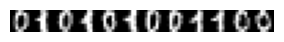

In [6]:
# ********************************************
#        VISUALIZING THE MNIST DATASET
# ********************************************

## DRAW MNIST IMAGE:
LoadDataQC.draw_mnist_data()

<span style="font-family: 'Computer Modern'; font-weight: bold; font-size: 24pt;">CONSTRUCTING QUANTUM CIRCUIT</span>

/Users/seanchisholm/VSCode_LPPC/qcnn-lppc/.conda/lib/python3.11/site-packages/pennylane/drawer/mpldrawer.py:581: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Arial.
  bbox = text_obj.get_window_extent(renderer)


*** QCNN QUANTUM CIRCUIT ***


/Users/seanchisholm/VSCode_LPPC/qcnn-lppc/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


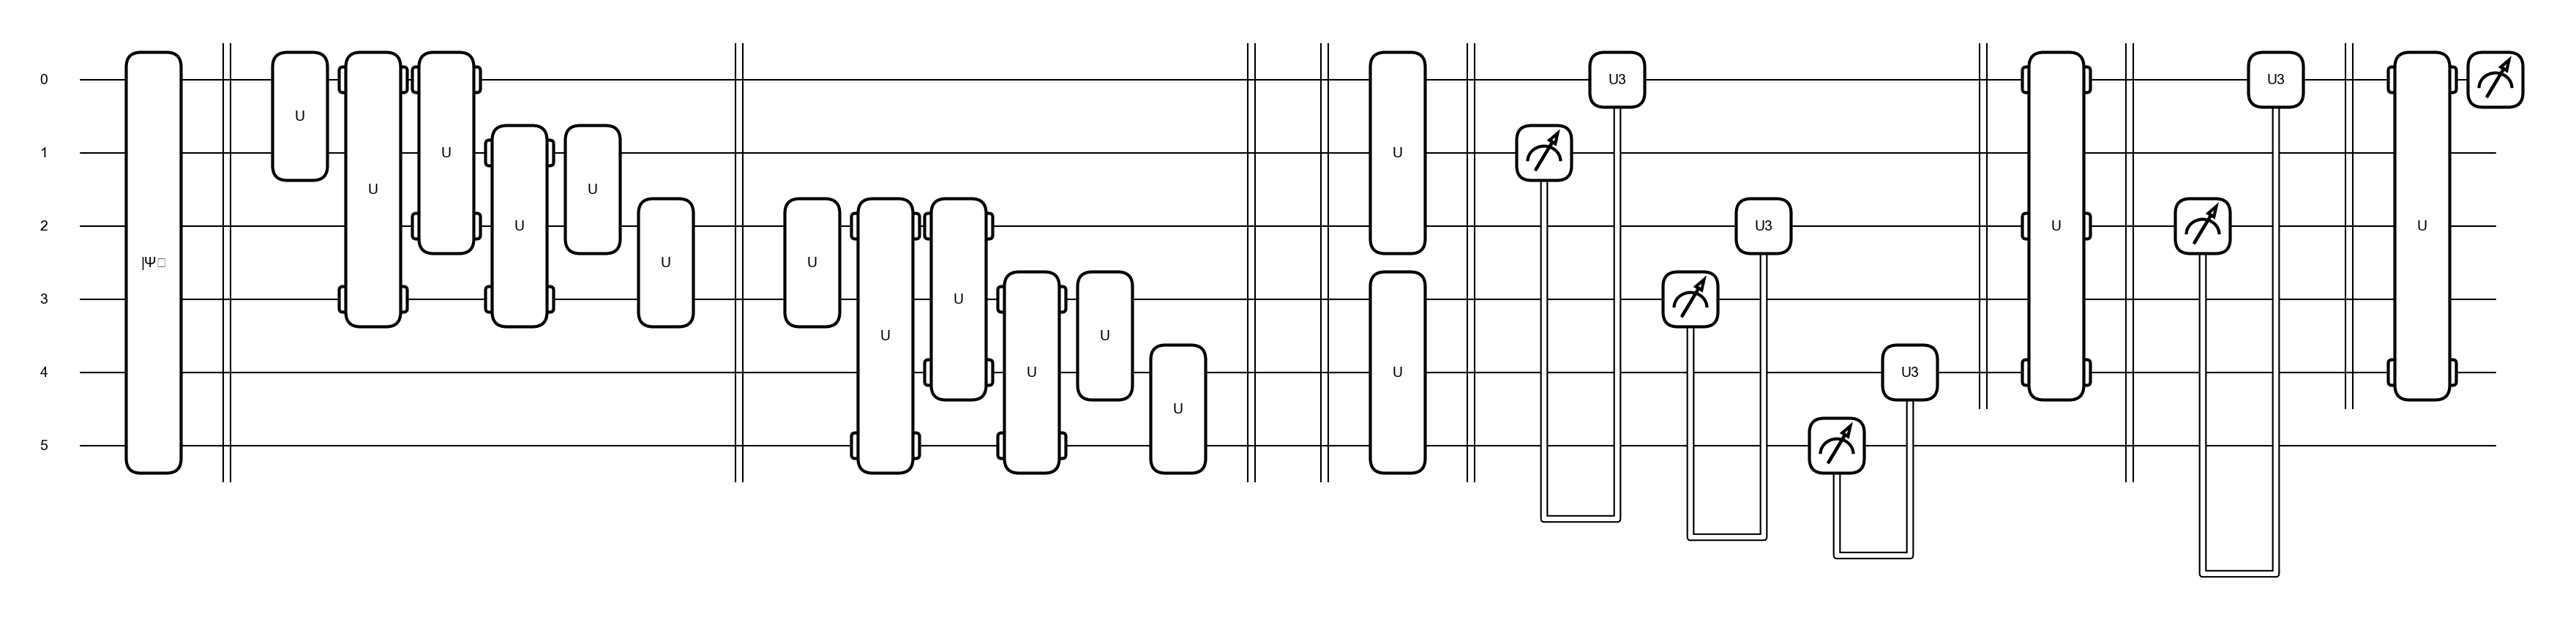

In [7]:
# ********************************************
#    VISUALIZING / PLOTTING QUANTUM CIRCUIT
# ********************************************

## QUANTUM CIRCUIT AND LAYERS CLASS:
from lppc_qcnn.circuit_layers import LayersQC # <--- INSTANCE METHOD (SELF)
# Define Instance of LayersQC:
layers_obj = LayersQC()

## DEFINE SAMPLE WEIGHTS / FEATURES:
# (Note: Adjust second dimension as needed)
weights = np.random.rand(81, 2) # <--- SHAPE ~ [(num_wires // 2) * (3 ** 3)]
# weights = jnp.array(weights) # WRAP WITH JAX
# weights = np.random.rand(num_wires, 2)
last_layer_weights = np.random.rand(4 ** 2 - 1)
# last_layer_weights = jnp.array(last_layer_weights) # WRAP WITH JAX
# last_layer_weights = np.random.rand(4 ** (num_wires // 2) - 1)
features = np.random.rand(2 ** num_wires)
# features = jnp.array(features) # WRAP WITH JAX

## DRAW QUANTUM CIRCUIT:
fig, ax = qml.draw_mpl(layers_obj.conv_net)(
layers_obj, weights, last_layer_weights, features
)

print("*** QCNN QUANTUM CIRCUIT ***")
plt.show()

*** QCNN CONVOLUTIONAL LAYER CIRCUIT ***


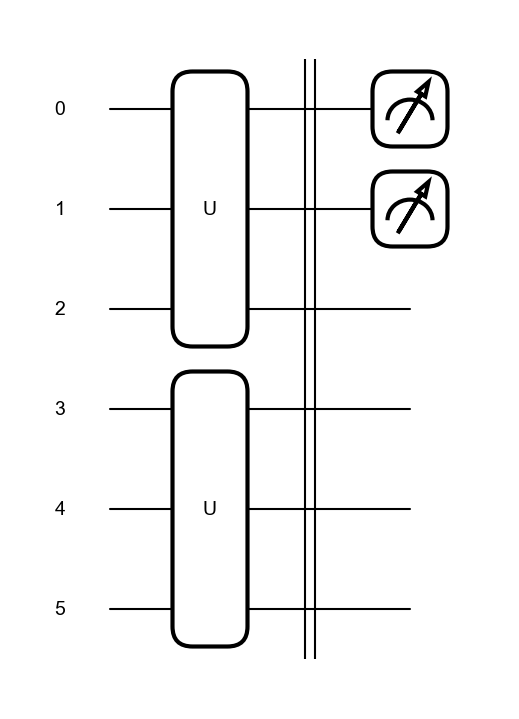

In [8]:
## DEFINE VARIABLES (CONV DRAWING):
n_qubits = 6  # Number of qubits
active_qubits = list(range(n_qubits))  # Active qubits
num_wires = 6  # Number of wires
num_wires_draw = 2  # Number of wires (DRAWINGS)

params_conv = weights[:, 0]  # Use appropriate slicing based on your need

## CONVOLUTIONAL LAYER:
@qml.qnode(device)
def conv_circuit(params, active_qubits):
    layers_obj.three_conv_layer(params, active_qubits)
    return qml.probs(wires=active_qubits[:num_wires_draw]) # reason for two measurements in figure (?)

## DRAW CONVOLUTIONAL LAYER CIRCUIT:
fig, ax = qml.draw_mpl(conv_circuit)(params_conv, active_qubits)
print("*** QCNN CONVOLUTIONAL LAYER CIRCUIT ***")
plt.show()

*** QCNN CONVOLUTIONAL AND POOLING LAYER CIRCUIT ***


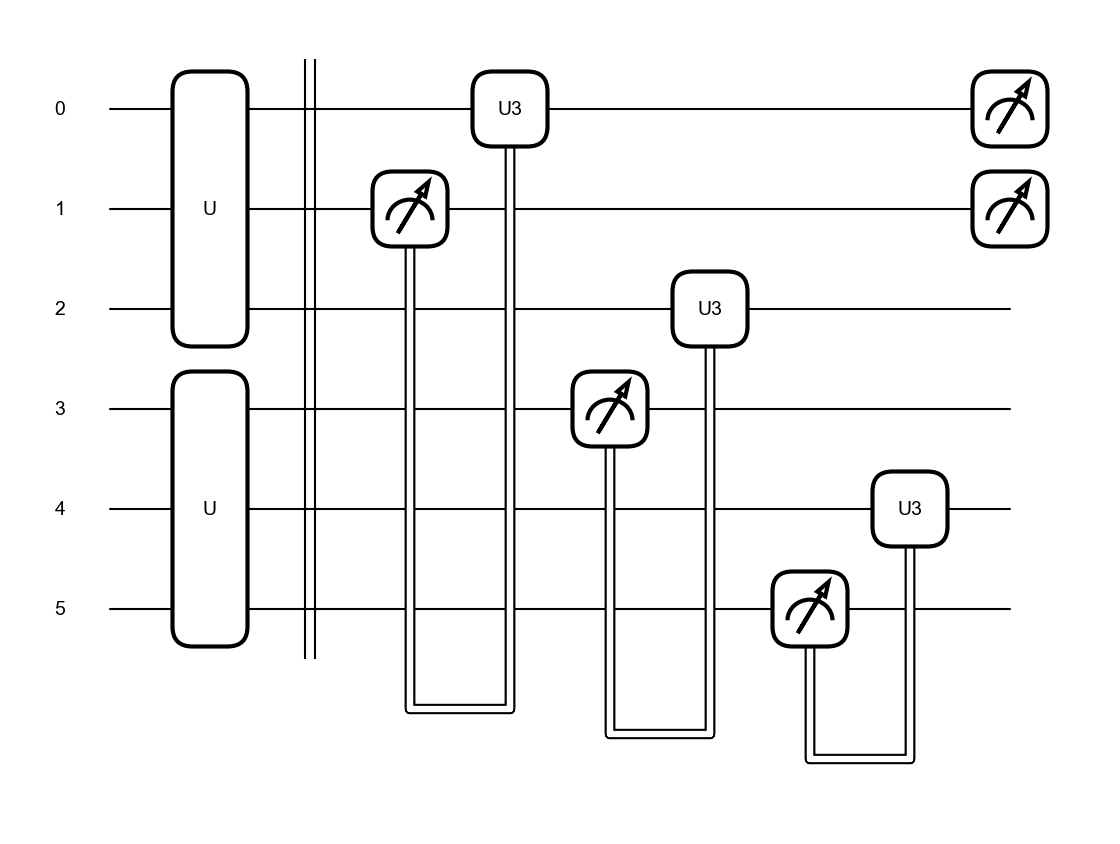

In [9]:
## CONVOLUTIONAL AND POOLING LAYER:
@qml.qnode(device)
def conv_and_pooling_circuit(kernel_weights, n_wires):
    layers_obj.conv_and_pooling(kernel_weights, n_wires)
    return qml.probs(wires=n_wires[:num_wires_draw])

## DRAW CONVOLUTIONAL AND POOLING LAYER CIRCUIT:
fig, ax = qml.draw_mpl(conv_and_pooling_circuit)(weights[:, 0], active_qubits)
print("*** QCNN CONVOLUTIONAL AND POOLING LAYER CIRCUIT ***")
plt.show()

In [10]:
# ********************************************
#         TRAINING QCNN / RESULTS (V1)
# ********************************************

## TRAINING QCNN CLASS:
from lppc_qcnn.circuit_layers import TrainQC  # TrainQC() <--- STATIC METHOD (FORMERLY INSTANCE METHOD (SELF))

# Define Instance of TrainQC (AS NEEDED):
# train_obj = TrainQC
# train_obj = TrainQC() # <- INSTANCE METHOD (SELF)

## DEFINE TRAIN PARAMETERS:
n_test = 2
n_train = 2
n_epochs = 100
n_reps = 10

# Train QCNN and get results:
results_df = TrainQC.compute_aggregated_results(num_train=n_train, num_test=n_test, num_epochs=n_epochs) # *6*

## *** ALTERNATES ***:
#results_df = train_obj.compute_aggregated_results(train_obj, n_train, n_test)  # *1*
#results_df = train_obj.compute_aggregated_results(n_train, n_test)  # *2*
#results_df = train_obj.compute_aggregated_results(n_train=n_train, n_test=n_test) # *3*
#results_df = compute_results(n_train=n_train, n_test=n_test, n_epochs=n_epochs) *4*
#results_df = compute_results_jit(n_train=n_train, n_test=n_test, n_epochs=n_epochs) # *5*

-> 'num_train': <class 'int'>, 'num_test': <class 'int'>
-> 'num_epochs': <class 'int'>
-> 'num_train': <class 'int'>, 'num_test': <class 'int'>
-> 'num_epochs': <class 'int'>
-> 'num_train': <class 'int'>, 'num_test': <class 'int'>
-> 'num_epochs': <class 'int'>
-> 'num_train': <class 'int'>, 'num_test': <class 'int'>
-> 'num_epochs': <class 'int'>
-> 'num_train': <class 'int'>, 'num_test': <class 'int'>
-> 'num_epochs': <class 'int'>
-> 'num_train': <class 'int'>, 'num_test': <class 'int'>
-> 'num_epochs': <class 'int'>
-> 'num_train': <class 'int'>, 'num_test': <class 'int'>
-> 'num_epochs': <class 'int'>
-> 'num_train': <class 'int'>, 'num_test': <class 'int'>
-> 'num_epochs': <class 'int'>
-> 'num_train': <class 'int'>, 'num_test': <class 'int'>
-> 'num_epochs': <class 'int'>
-> 'num_train': <class 'int'>, 'num_test': <class 'int'>
-> 'num_epochs': <class 'int'>
-> 'num_train': <class 'int'>, 'num_test': <class 'int'>
-> 'num_epochs': <class 'int'>
-> 'num_train': <class 'int'>, '

In [11]:
print(results_df)

    n_train step           train_cost train_acc            test_cost test_acc
0         2    1   0.5222181945052744       1.0  0.42343398199170135      1.0
1         2    2  0.43738806176739853       1.0    0.399103005972684      1.0
2         2    3   0.3727325903258696       1.0  0.35130579944446927      1.0
3         2    4  0.30782381169454176       1.0    0.357524134611406      1.0
4         2    5  0.31189513254090806       1.0  0.34891068620564614      1.0
..      ...  ...                  ...       ...                  ...      ...
995       2   96  0.12976269438672539       1.0   0.2021853157265272      1.0
996       2   97  0.12959803246298873       1.0  0.20264229132109168      1.0
997       2   98   0.1295077466209662       1.0  0.20213827260301054      1.0
998       2   99   0.1293998544132804       1.0  0.20283058810077526      1.0
999       2  100   0.1292316148169852       1.0  0.20228192529336808      1.0

[1000 rows x 6 columns]


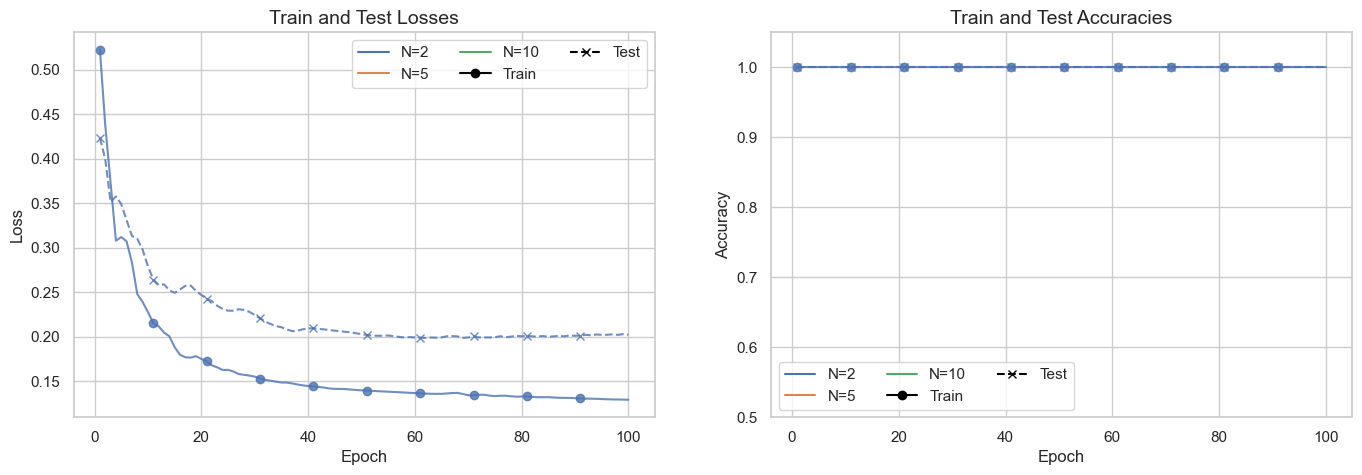

"\nTrainQC.plot_aggregated_results(results_df, n_train, steps, \n                                  title_loss='Train and Test Losses', \n                                  title_accuracy='Train and Test Accuracies', \n                                  markevery=10) # *2* (NO SELF)\nTrainQC.plot_aggregated_results(results_df, n_train=n_train, steps=steps, \n                                  title_loss='Train and Test Losses', \n                                  title_accuracy='Train and Test Accuracies', \n                                  markevery=10) # *3*\n"

In [12]:
# ********************************************
#     PLOTTING AGGREGATED TRAINING RESULTS
# ********************************************

## DEFINE TRAIN PARAMETERS (ALSO ABOVE):
# n_test = 2
n_train = 2
n_epochs = 100
steps = 100
# train_obj = TrainQC() (RECALL)

# Plot aggregated training results:
TrainQC.plot_aggregated_results(results_df, n_train, steps=n_epochs, 
                                  title_loss='Train and Test Losses', 
                                  title_accuracy='Train and Test Accuracies', 
                                  markevery=10) # *1*

## ALTERNATES:
'''
TrainQC.plot_aggregated_results(results_df, n_train, steps, 
                                  title_loss='Train and Test Losses', 
                                  title_accuracy='Train and Test Accuracies', 
                                  markevery=10) # *2* (NO SELF)
TrainQC.plot_aggregated_results(results_df, n_train=n_train, steps=steps, 
                                  title_loss='Train and Test Losses', 
                                  title_accuracy='Train and Test Accuracies', 
                                  markevery=10) # *3*
'''

***

<span style="font-family: 'Computer Modern'; font-weight: bold; font-size: 24pt;">CODE TESTING / VALIDATION</span>

In [13]:
### ***** DATA (FOR FUTURE IMPLEMENTATION) *****:
# x_train, y_train, x_test, y_test = load_moments(n_train, n_test, rng) # Loading moments
# x_train, y_train, x_test, y_test = load_IC_data(n_train, n_test, rng) # Loading IC data

In [14]:
### ***** TESTING RNG TYPES *****:

# Example usage of numpy.random.Generator
rng_test = np.random.default_rng()
print(f"Type of rng: {type(rng_test)}")

# Example usage of jax.random.PRNGKey
rng_jax_test = jax.random.PRNGKey(0)
print(f"Type of rng_jax: {type(rng_jax_test)}")

'''
### ***** TESTING BINARY CLASSIFICATION (WITH JAX PRNGKEY) *****:
# use jnp.where(mask) to filter features and labels
features = features[jnp.where(mask)] # (Note: not static during slicing)
labels = labels[jnp.where(mask)] # (Note: not static during slicing)
'''

Type of rng: <class 'numpy.random._generator.Generator'>
Type of rng_jax: <class 'jaxlib.xla_extension.ArrayImpl'>


'\n### ***** TESTING BINARY CLASSIFICATION (WITH JAX PRNGKEY) *****:\n# use jnp.where(mask) to filter features and labels\nfeatures = features[jnp.where(mask)] # (Note: not static during slicing)\nlabels = labels[jnp.where(mask)] # (Note: not static during slicing)\n'

In [15]:
### ***** RANDOM *****:

'''
a = x_train[0]

# ************************************************

print(type(a))

# ************************************************

full_array = jnp.array(
        [
            [
                [0,0,0],
                [2,2,2],
                [0,0,0],
                [0,0,0]
            ],
            [
                [1,1,1],
                [0,0,0],
                [0,0,0],
                [0,0,0]
            ],
            [
                [1,1,1],
                [0,0,0],
                [0,0,0],
                [0,0,0]
            ]
        ]
)
'''

'\na = x_train[0]\n\n# ************************************************\n\nprint(type(a))\n\n# ************************************************\n\nfull_array = jnp.array(\n        [\n            [\n                [0,0,0],\n                [2,2,2],\n                [0,0,0],\n                [0,0,0]\n            ],\n            [\n                [1,1,1],\n                [0,0,0],\n                [0,0,0],\n                [0,0,0]\n            ],\n            [\n                [1,1,1],\n                [0,0,0],\n                [0,0,0],\n                [0,0,0]\n            ]\n        ]\n)\n'

In [16]:
### ***** TESTING JIT-COMPILED DATA LOADING *****:

'''
## JAX DIGITS DATA:
# Load data outside JIT-compiled function (AS NEEDED):
x_train, y_train, x_test, y_test = LoadDataQC.load_digits_data(n_train, n_test, rng)
'''

'''
### ***** ATTEMPT 1 (Wrapping 'compute_aggregated_results') *****:
# Define wrapper function to call method and apply jax:
compute_results = jax.jit(train_obj.compute_aggregated_results)

# Run training for multiple sizes and aggregate results:
results_df = compute_results(n_train=n_train, n_test=n_test, n_epochs=n_epochs) # *4 (WRAPPED WITH JAX) *

### ***** ATTEMPT 2 (Wrapping 'compute_aggregated_results') *****:
# Wrapper Function for 'compute_aggregated_results':
def compute_results(train_obj, n_train, n_test, n_epochs):
    return train_obj.compute_aggregated_results(n_train=n_train, n_test=n_test, n_epochs=n_epochs)
    # return train_obj.compute_aggregated_results(train_obj, n_train=n_train, n_test=n_test, n_epochs=n_epochs)
# compute_results = jax.jit(train_obj.compute_aggregated_results)

### ***** ATTEMPT 3 (Wrapping 'compute_aggregated_results') *****:
train_obj = TrainQC()
# New results function for wrapping:
def compute_results_wrapper(n_train, n_test, n_epochs):
    return train_obj.compute_aggregated_results(n_train, n_test, n_epochs)

# JIT-compile Wrapper Function:
compute_results_jit = jax.jit(compute_results_wrapper)
#compute_jit = jax.jit(lambda n_train, n_test, n_epochs: compute_results_wrapper(train_obj, n_train, n_test, n_epochs))
'''

"\n### ***** ATTEMPT 1 (Wrapping 'compute_aggregated_results') *****:\n# Define wrapper function to call method and apply jax:\ncompute_results = jax.jit(train_obj.compute_aggregated_results)\n\n# Run training for multiple sizes and aggregate results:\nresults_df = compute_results(n_train=n_train, n_test=n_test, n_epochs=n_epochs) # *4 (WRAPPED WITH JAX) *\n\n### ***** ATTEMPT 2 (Wrapping 'compute_aggregated_results') *****:\n# Wrapper Function for 'compute_aggregated_results':\ndef compute_results(train_obj, n_train, n_test, n_epochs):\n    return train_obj.compute_aggregated_results(n_train=n_train, n_test=n_test, n_epochs=n_epochs)\n    # return train_obj.compute_aggregated_results(train_obj, n_train=n_train, n_test=n_test, n_epochs=n_epochs)\n# compute_results = jax.jit(train_obj.compute_aggregated_results)\n\n### ***** ATTEMPT 3 (Wrapping 'compute_aggregated_results') *****:\ntrain_obj = TrainQC()\n# New results function for wrapping:\ndef compute_results_wrapper(n_train, n_test, 

In [17]:
# ********************************************
#         TRAINING QCNN / RESULTS (V2)
# ********************************************

'''
### ***** TRAINING QCNN W/O LOOP FUNCTION ('train_qcnn) *****:
from lppc_qcnn.circuit_layers import TrainQC  # TrainQC() <--- INSTANCE METHOD (SELF)

# Define Instance of TrainQC:
# train_obj = TrainQC
train_obj = TrainQC()

## DEFINE TRAIN PARAMETERS:
n_test = 2
n_train = 2
n_epochs = 100
n_reps = 10

# Define wrapper function to call method and apply jax:
@jax.jit
def run_iterations(n_train, n_test):
    return train_obj.run_iterations(n_train=n_train, n_test=n_test)

## RUN TRAINING LOOP:
train_sizes = [2]
results_df = run_iterations(n_train=n_train, n_test=n_test)
for n_train in train_sizes[1:]:
    results_df = pd.concat([results_df, run_iterations(n_train=n_train, n_test=n_test)])
'''

"\n### ***** TRAINING QCNN W/O LOOP FUNCTION ('train_qcnn) *****:\nfrom lppc_qcnn.circuit_layers import TrainQC  # TrainQC() <--- INSTANCE METHOD (SELF)\n\n# Define Instance of TrainQC:\n# train_obj = TrainQC\ntrain_obj = TrainQC()\n\n## DEFINE TRAIN PARAMETERS:\nn_test = 2\nn_train = 2\nn_epochs = 100\nn_reps = 10\n\n# Define wrapper function to call method and apply jax:\n@jax.jit\ndef run_iterations(n_train, n_test):\n    return train_obj.run_iterations(n_train=n_train, n_test=n_test)\n\n## RUN TRAINING LOOP:\ntrain_sizes = [2]\nresults_df = run_iterations(n_train=n_train, n_test=n_test)\nfor n_train in train_sizes[1:]:\n    results_df = pd.concat([results_df, run_iterations(n_train=n_train, n_test=n_test)])\n"

In [18]:
### ***** FUNCTIONALITY CHECK FOR TRAINING DICTIONARY (TrainQC.train_qcnn(args, *kwargs)) *****:

'''
train_dict = dict(
    n_train=[n_train] * n_epochs,
    step=jnp.arange(1, n_epochs + 1, dtype=int), # NP -> JNP
    train_cost=train_cost_epochs,
    train_acc=train_acc_epochs,
    test_cost=test_cost_epochs,
    test_acc=test_acc_epochs,
)
# TYPE (DICTIONARY):
print(f"train_dict: type = {type(train_dict)}")

# SHAPES AND TYPES (DICTIONARY ITEMS):
print(f"train_dict shapes and types:")
for key, value in train_dict.items():
    print(f"{key}: shape = {jnp.shape(value)}, type = {type(value)}") # NP -> JNP
'''

'\ntrain_dict = dict(\n    n_train=[n_train] * n_epochs,\n    step=jnp.arange(1, n_epochs + 1, dtype=int), # NP -> JNP\n    train_cost=train_cost_epochs,\n    train_acc=train_acc_epochs,\n    test_cost=test_cost_epochs,\n    test_acc=test_acc_epochs,\n)\n# TYPE (DICTIONARY):\nprint(f"train_dict: type = {type(train_dict)}")\n\n# SHAPES AND TYPES (DICTIONARY ITEMS):\nprint(f"train_dict shapes and types:")\nfor key, value in train_dict.items():\n    print(f"{key}: shape = {jnp.shape(value)}, type = {type(value)}") # NP -> JNP\n'

In [19]:
### ***** LOADING DATA IN TRAIN_QCNN() *****:
'''
        # Prepare data (NumPy)
        features_np, labels_np = LoadDataQC.prepare_data()
        features = jnp.array(features_np) # NP -> JAX Arrays
        labels = jnp.array(labels_np) # NP -> JAX Arrays

        # Define RNG:
        # rng_jax = jax.random.PRNGKey(seed=seed)  # *1* (JAX)
        # rng = rng_jax

        ## JAX.JIT CONFIGURATION:
        # ----------------------------------------------------------------------------------------------------
        use_wrapped_version_train = True  # TRUE -> jax.jit-wrapped version, FALSE -> direct call

        ## TRUE (JAX.JIT-WRAPPED):
        if use_wrapped_version_train is True:
            # Load data using wrapped function:
            load_digits_jax_V3_wrapped = jax.jit(LoadDataQC.load_digits_jax_V3)
            x_train, y_train, x_test, y_test = load_digits_jax_V3_wrapped(n_train, n_test, features, labels)
        # FALSE (DIRECT CALL):
        else:
            x_train, y_train, x_test, y_test = LoadDataQC.load_digits_jax_V3(n_train=n_train, n_test=n_test,
                                                                            features=features, labels=labels)
            # x_train, y_train, x_test, y_test = LoadDataQC.load_digits_jax_V1(n_train, n_test) # JAX *1*
            # x_train, y_train, x_test, y_test = LoadDataQC.load_digits_data(n_train, n_test, rng)
        # ----------------------------------------------------------------------------------------------------
'''

'\n        # Prepare data (NumPy)\n        features_np, labels_np = LoadDataQC.prepare_data()\n        features = jnp.array(features_np) # NP -> JAX Arrays\n        labels = jnp.array(labels_np) # NP -> JAX Arrays\n\n        # Define RNG:\n        # rng_jax = jax.random.PRNGKey(seed=seed)  # *1* (JAX)\n        # rng = rng_jax\n\n        ## JAX.JIT CONFIGURATION:\n        # ----------------------------------------------------------------------------------------------------\n        use_wrapped_version_train = True  # TRUE -> jax.jit-wrapped version, FALSE -> direct call\n\n        ## TRUE (JAX.JIT-WRAPPED):\n        if use_wrapped_version_train is True:\n            # Load data using wrapped function:\n            load_digits_jax_V3_wrapped = jax.jit(LoadDataQC.load_digits_jax_V3)\n            x_train, y_train, x_test, y_test = load_digits_jax_V3_wrapped(n_train, n_test, features, labels)\n        # FALSE (DIRECT CALL):\n        else:\n            x_train, y_train, x_test, y_test = Load

***